### Imports

In [21]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio

def interpret_confusion_matrix(matrix, title, labels):
    encode, correct, errors, total = [],[],[],[]
    i=0
    for row in matrix:
        total.append(sum(row))
        correct.append(row[i])
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors.append(sum(consider))
        i+=1

    fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Correctly Classified","Incorrectly Classified","Total"]),cells=dict(values=[labels, correct, errors, total]))])
    fig.update_layout(title= title,width=650,height=400)

    fig.show()
    pio.write_image(fig, f"Graphs/Naive_Bayes/{title}.png", format='png')


labels = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

df = pd.read_csv("data/DataEncoded.csv")

### Train Test Split

In [22]:
X = df.drop(["NObeyesdad"], axis=1)
Y = df["NObeyesdad"]

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### Evaluation

#### Gaussian

Cross Validation Score: 0.6408933002481391
Precision Score: 0.6660550063946753
Recall Score: 0.6649484536082474
F1 score: 0.6497736882727508
Accuracy: 0.6649484536082474


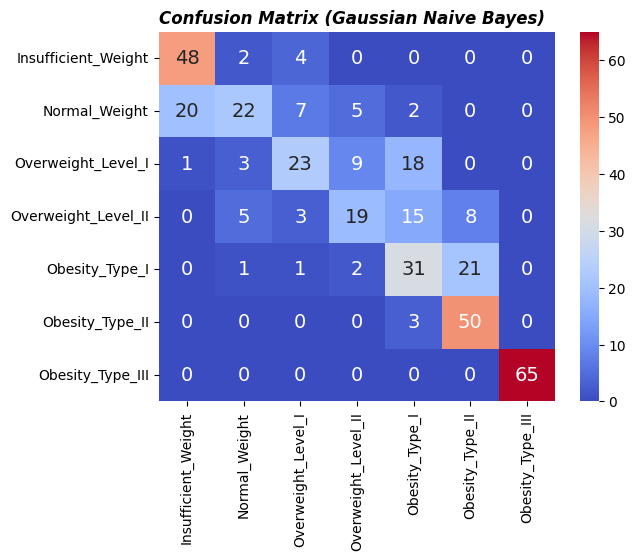

In [23]:
clf = GaussianNB()
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Gaussian Naive Bayes)",loc='left', fontweight='bold',  style='italic')
plt.savefig('Graphs/Naive_Bayes/Confusion Matrix (Gaussian Naive Bayes).png', bbox_inches='tight')
plt.show()
interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Naive Bayes - Gaussian", labels)

#### Multinomial

Cross Validation Score: 0.6563564929693964
Precision Score: 0.6692677416858296
Recall Score: 0.6752577319587629
F1 score: 0.6671947654022841
Accuracy: 0.6752577319587629


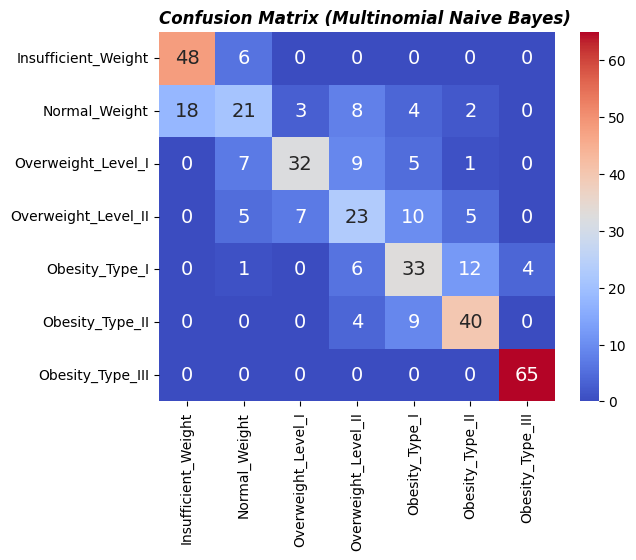

In [24]:
clf = MultinomialNB()
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Multinomial Naive Bayes)",loc='left', fontweight='bold',  style='italic')
plt.savefig('Graphs/Naive_Bayes/Confusion Matrix (Multinomial Naive Bayes).png', bbox_inches='tight')
plt.show()
interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Naive Bayes - Multinomial", labels)

#### Bernoulli

Cross Validation Score: 0.49194375516956157
Precision Score: 0.5398247092582044
Recall Score: 0.5128865979381443
F1 score: 0.49097397122872766
Accuracy: 0.5128865979381443


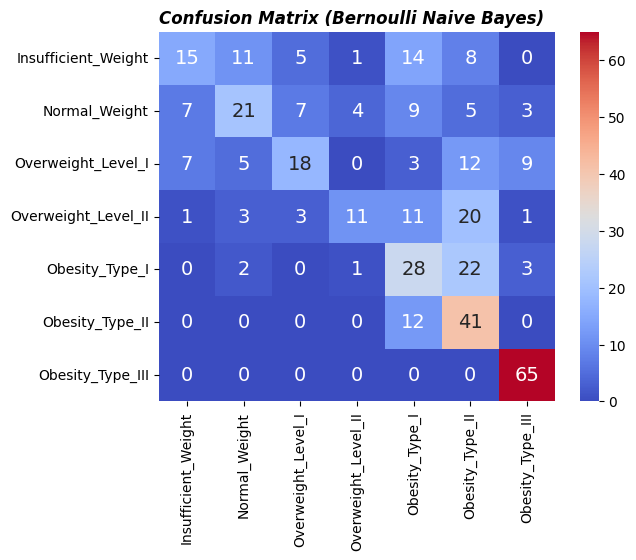

In [25]:
clf = BernoulliNB()
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Bernoulli Naive Bayes)",loc='left', fontweight='bold',  style='italic')
plt.savefig('Graphs/Naive_Bayes/Confusion Matrix (Bernoulli Naive Bayes).png', bbox_inches='tight')
plt.show()
interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Naive Bayes - Bernoulli Naive Bayes", labels)

- Bernoulli Naive bayes is good at handling boolean/binary attributes.
- Multinomial Naive bayes is good at handling discrete values.
- Gaussian naive bayes is good at handling continuous values.